In [64]:
# Import libraries
library(sp)
library(rgdal)
library(rgeos)

In [65]:
# Open files

# Open Philadelphia homicides database
path_hom <- "./data/PhillyHomicides/"
philly_hom <- readOGR(dsn=path_hom, "PhillyHomicides")

# open Philadelphia education database
path_edu <- "./data/PhiladelphiaEduAttain.csv"
philly_edu <- read.csv(path_edu)

# Open Philadelphia region database
path <- "./data/Philly/"
philly <- readOGR(dsn=path, "PhillyTotalPopHHinc")

OGR data source with driver: ESRI Shapefile 
Source: "/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/PhillyHomicides", layer: "PhillyHomicides"
with 3883 features
It has 8 fields


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum D_unknown in CRS definition: +proj=aea +lat_0=37.5 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs”

OGR data source with driver: ESRI Shapefile 
Source: "/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/Philly", layer: "PhillyTotalPopHHinc"
with 384 features
It has 17 fields


In [66]:
names(philly_edu)

[1] "GEOID"           "NAME"            "fem_bachelor"    "fem_doctorate"  
 [5] "fem_highschool"  "fem_noschool"    "fem_ovr_25"      "male_bachelor"  
 [9] "male_doctorate"  "male_highschool" "male_noschool"   "male_ovr_25"    
[13] "pop_ovr_25"

In [67]:
str(philly)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	384 obs. of  17 variables:
  .. ..$ STATEFP10 : Factor w/ 1 level "42": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ COUNTYFP10: Factor w/ 1 level "101": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ TRACTCE10 : Factor w/ 384 levels "000100","000200",..: 347 350 353 329 326 345 46 82 173 15 ...
  .. ..$ GEOID10   : Factor w/ 384 levels "42101000100",..: 347 350 353 329 326 345 46 82 173 15 ...
  .. ..$ NAME10    : Factor w/ 384 levels "1","10.01","10.02",..: 281 284 287 262 259 279 299 354 86 3 ...
  .. ..$ NAMELSAD10: Factor w/ 384 levels "Census Tract 1",..: 281 284 287 262 259 279 299 354 86 3 ...
  .. ..$ MTFCC10   : Factor w/ 1 level "G5020": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ FUNCSTAT10: Factor w/ 1 level "S": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ ALAND10   : num [1:384] 2322732 4501110 1004313 1271533 1016206 ...
  .. ..$ AWATER10  : num [1:384] 66075 8014 1426278 8021 0 ...
  .. ..$ INTPTLAT10: Factor w/ 384 le

In [68]:
str(philly_hom)

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	3883 obs. of  8 variables:
  .. ..$ DC_DIST   : int [1:3883] 22 1 1 1 1 1 1 1 1 1 ...
  .. ..$ SECTOR    : Factor w/ 30 levels "1","2","3","4",..: 1 6 6 6 9 10 6 14 14 5 ...
  .. ..$ DISPATCH_D: Factor w/ 2228 levels "2006-01-01","2006-01-02",..: 2139 10 62 90 125 132 133 139 199 211 ...
  .. ..$ DISPATCH_T: Factor w/ 1263 levels "00:00:00","00:01:00",..: 799 1 804 561 633 981 1224 86 1063 1013 ...
  .. ..$ LOCATIO   : Factor w/ 3305 levels "\"A\" ST  & WESTMORELAND ST",..: 590 740 3135 801 823 583 574 848 878 620 ...
  .. ..$ UCR_GEN   : int [1:3883] 100 100 100 100 100 100 100 100 100 100 ...
  .. ..$ OBJ_ID    : int [1:3883] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ TEXT_GE   : Factor w/ 3 levels "Homicide - Criminal",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..@ coords.nrs : num(0) 
  ..@ coords     : num [1:3883, 1:2] -75.2 -75.2 -75.2 -75.2 -75.2 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : N

In [69]:
philly

An object of class "SpatialPolygonsDataFrame"
Slot "data":
    STATEFP10 COUNTYFP10 TRACTCE10     GEOID10 NAME10          NAMELSAD10
0          42        101    036301 42101036301 363.01 Census Tract 363.01
1          42        101    036400 42101036400    364    Census Tract 364
2          42        101    036600 42101036600    366    Census Tract 366
3          42        101    034803 42101034803 348.03 Census Tract 348.03
4          42        101    034702 42101034702 347.02 Census Tract 347.02
5          42        101    036202 42101036202 362.02 Census Tract 362.02
6          42        101    003800 42101003800     38     Census Tract 38
7          42        101    008302 42101008302  83.02  Census Tract 83.02
8          42        101    017602 42101017602 176.02 Census Tract 176.02
9          42        101    001002 42101001002  10.02  Census Tract 10.02
10         42        101    001001 42101001001  10.01  Census Tract 10.01
11         42        101    000402 42101000402   4.02

In [70]:
philly_hom

               coordinates DC_DIST SECTOR DISPATCH_D DISPATCH_T
1     (-75.1568, 39.98804)      22      1 2014-09-14   16:00:00
2    (-75.17873, 39.92801)       1      B 2006-01-14   00:00:00
3    (-75.18275, 39.92607)       1      B 2006-04-01   16:05:00
4    (-75.18092, 39.92704)       1      B 2006-05-10   11:13:00
5    (-75.17204, 39.92463)       1      E 2006-07-01   12:42:00
6    (-75.17612, 39.92517)       1      F 2006-07-09   19:13:00
7     (-75.1785, 39.92927)       1      B 2006-07-10   23:20:00
8    (-75.18419, 39.92493)       1      J 2006-07-16   01:26:00
9     (-75.1843, 39.92424)       1      J 2006-10-03   20:37:00
10   (-75.17702, 39.92861)       1      A 2006-10-16   19:46:00
11    (-75.1726, 39.92597)       1      A 2006-12-08   00:01:00
12    (-75.06642, 40.0563)       2      D 2006-02-20   17:02:00
13   (-75.08415, 40.04319)       2      L 2006-04-14   21:32:00
14   (-75.10323, 40.03006)       2      N 2006-05-03   22:51:00
15   (-75.07865, 40.04133)       2      

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints obj

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

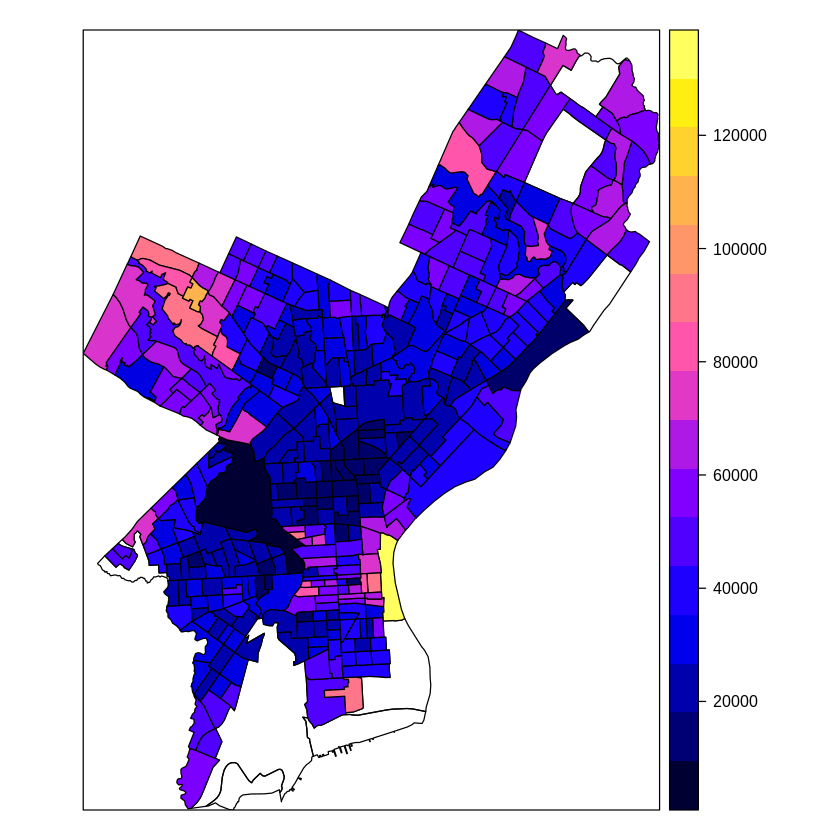

In [71]:
# Median household income
spplot(philly, "medHHinc")

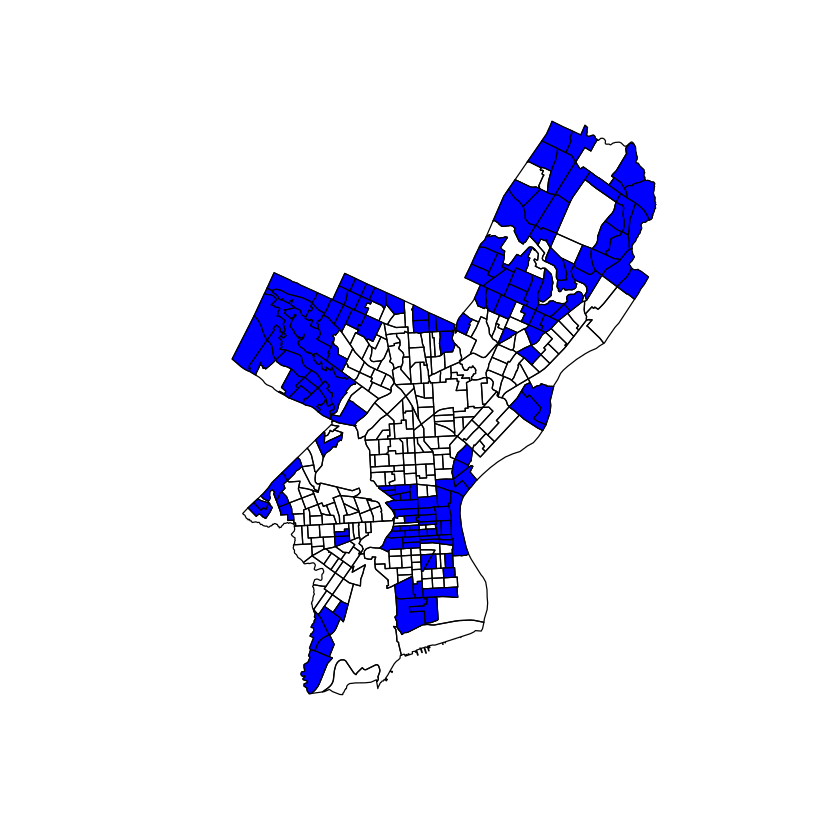

In [72]:
# Subset where household income is more than 40 000$
plot(philly)
philly_40k <- subset(philly, medHHinc > 40000)
plot(philly_40k, add=T, col="blue")

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints obj

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

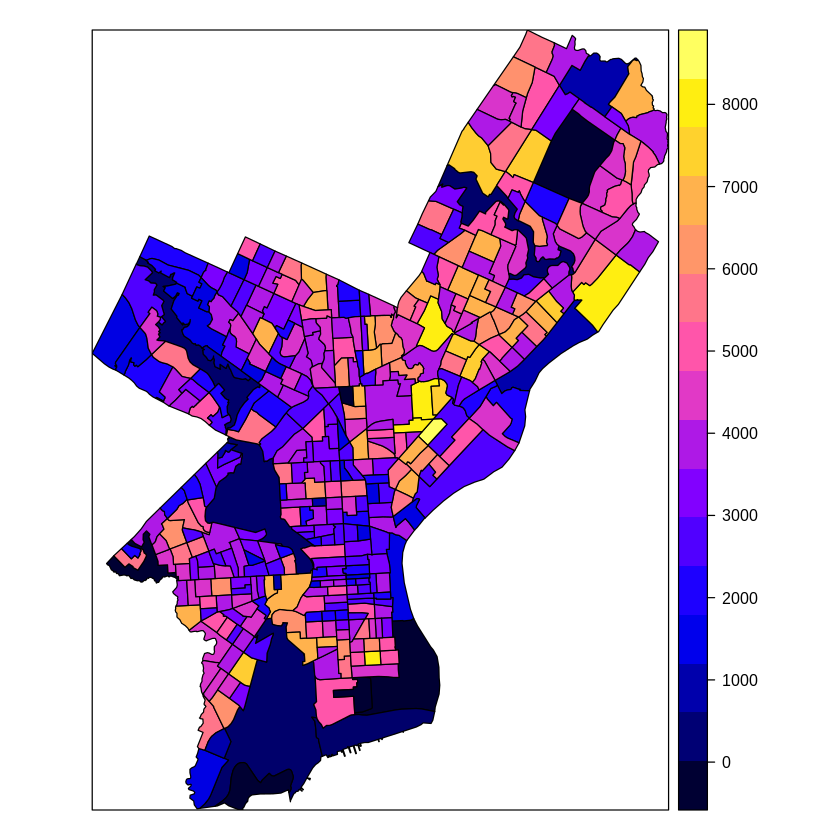

In [73]:
# Total population
spplot(philly, "totalPop")

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

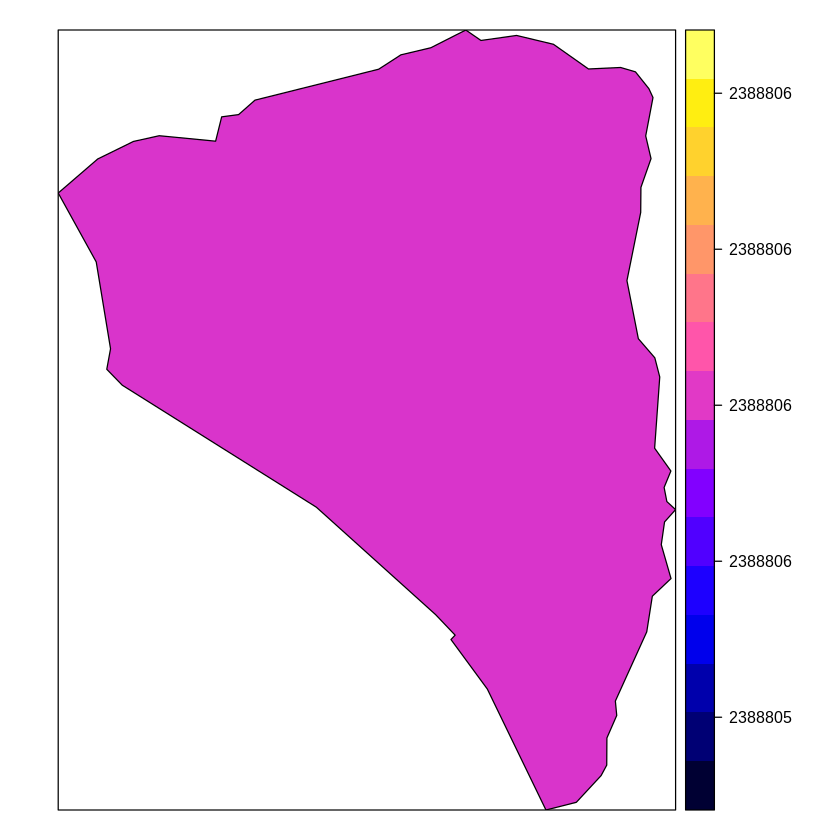

In [74]:
# Display shape orea for only first region
first_region_shape_area = philly[1, "Shape_area"]
spplot(first_region_shape_area)

Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”

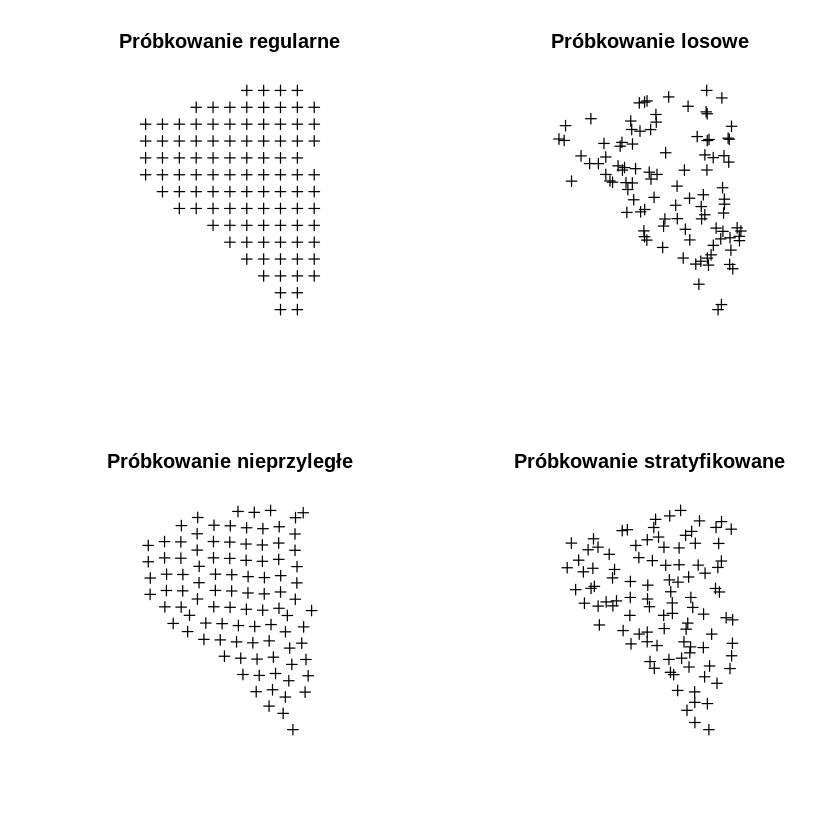

In [75]:
# Sampling
par(mfrow=c(2, 2))

set.seed(225)
regular <- spsample(first_region_shape_area, 100, type="regular", pretty=TRUE)
plot(regular, main="Próbkowanie regularne")

set.seed(225)
random <- spsample(first_region_shape_area, 100, type="random", pretty=TRUE)
plot(random, main="Próbkowanie losowe")

set.seed(225)
nonaligned <- spsample(first_region_shape_area, 100, type="nonaligned", main="Próbkowanie nieprzyległe")
plot(nonaligned, main="Próbkowanie nieprzyległe")

set.seed(225)
stratified <- spsample(first_region_shape_area, 100, type="stratified")
plot(stratified, main="Próbkowanie stratyfikowane")

In [76]:
# Join database
philly_merge_edu <- merge(philly, philly_edu, by.x="GEOID10", by.y="GEOID")
names(philly_merge_edu)

[1] "GEOID10"         "STATEFP10"       "COUNTYFP10"      "TRACTCE10"      
 [5] "NAME10"          "NAMELSAD10"      "MTFCC10"         "FUNCSTAT10"     
 [9] "ALAND10"         "AWATER10"        "INTPTLAT10"      "INTPTLON10"     
[13] "GISJOIN"         "Shape_area"      "Shape_len"       "medHHinc"       
[17] "totalPop"        "NAME"            "fem_bachelor"    "fem_doctorate"  
[21] "fem_highschool"  "fem_noschool"    "fem_ovr_25"      "male_bachelor"  
[25] "male_doctorate"  "male_highschool" "male_noschool"   "male_ovr_25"    
[29] "pop_ovr_25"

In [77]:
# Reprojecting

# Check current coordinates
range(coordinates(philly))
range(coordinates(philly_hom))

proj4string(philly)
proj4string(philly_hom)

# Transport
philly_hom <- spTransform(philly_hom, CRS(proj4string(philly)))

# Check results
range(coordinates(philly))
range(coordinates(philly_hom))

proj4string(philly)
proj4string(philly_hom)

[1]  458379.8 1763287.6

[1] -75.26809  40.13086

Warning message in proj4string(philly):
“CRS object has comment, which is lost in output”

[1] "+proj=aea +lat_0=37.5 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"

Warning message in proj4string(philly_hom):
“CRS object has comment, which is lost in output”

[1] "+proj=longlat +datum=WGS84 +no_defs"

Warning message in proj4string(philly):
“CRS object has comment, which is lost in output”Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on GRS80 ellipsoid in CRS definition”

[1]  458379.8 1763287.6

[1]  457489.7 1763671.8

Warning message in proj4string(philly):
“CRS object has comment, which is lost in output”

[1] "+proj=aea +lat_0=37.5 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"

Warning message in proj4string(philly_hom):
“CRS object has comment, which is lost in output”

[1] "+proj=aea +lat_0=37.5 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints obj

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

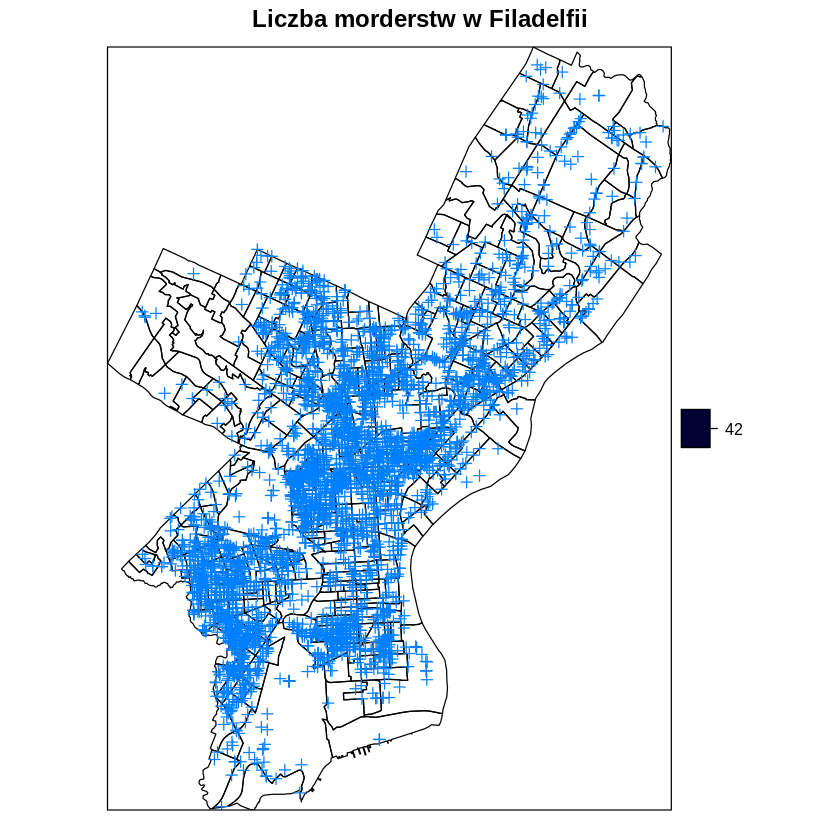

In [93]:
# Display two datasets
spplot(philly[,1], colorkey=TRUE, sp.layout=philly_hom["OBJ_ID"], main="Liczba morderstw w Filadelfii")

In [79]:
# Spatial aggregation
philly_aggr <- aggregate(x=philly_hom["OBJ_ID"], by=philly, FUN=length)
# class(philly_aggr)
# names(philly_aggr)
# head(philly_aggr)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

[1] "OBJ_ID"

An object of class "SpatialPolygonsDataFrame"
Slot "data":
  OBJ_ID
0      2
1      3
2     11
3      3
4      4
5      5

Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 1763287.6  486202.5

Slot "area":
[1] 2391356

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
         [,1]     [,2]
 [1,] 1763647 484837.3
 [2,] 1763473 485194.5
 [3,] 1763366 485341.0
 [4,] 1763378 485353.9
 [5,] 1763321 485414.1
 [6,] 1762968 485731.8
 [7,] 1762395 486092.3
 [8,] 1762349 486139.4
 [9,] 1762360 486200.0
[10,] 1762318 486456.6
[11,] 1762206 486660.2
[12,] 1762322 486760.9
[13,] 1762428 486812.6
[14,] 1762504 486829.5
[15,] 1762671 486813.4
[16,] 1762689 486885.2
[17,] 1762739 486891.9
[18,] 1762787 486934.6
[19,] 1763152 487026.0
[20,] 1763218 487068.5
[21,] 1763307 487089.4
[22,] 1763410 487141.8
[23,] 1763455 487110.9
[24,] 1763560 487125.7
[25,] 1763669 487099.6
[26,] 1763772 487026.7
[27,] 1763867 487031.1
[

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints obj

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

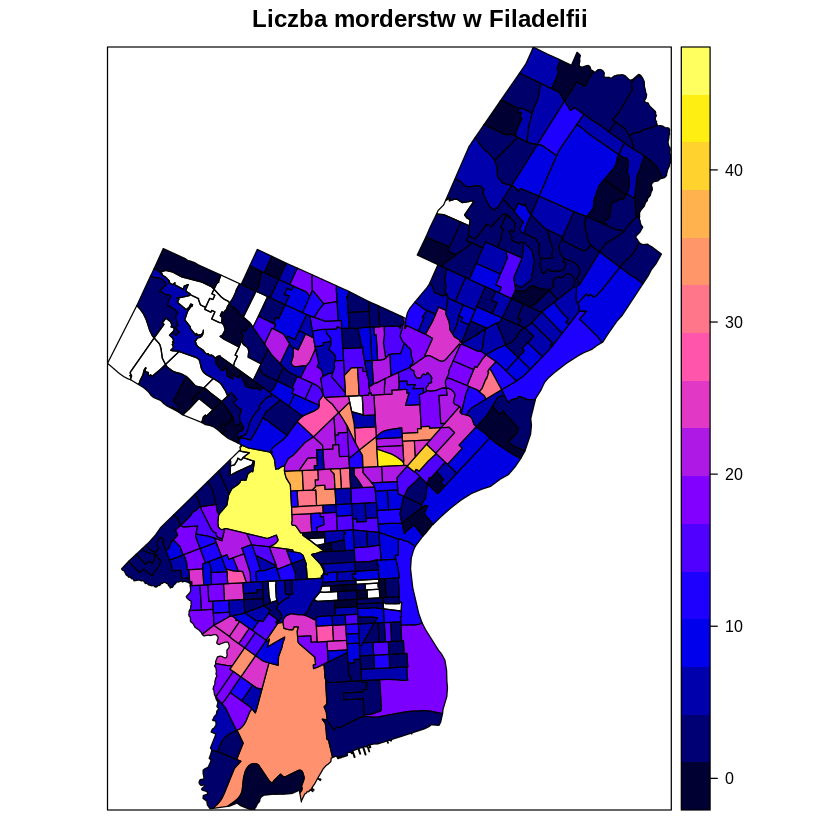

In [80]:
# Number of murders in Phipadelphia
spplot(philly_aggr, main="Liczba morderstw w Filadelfii")

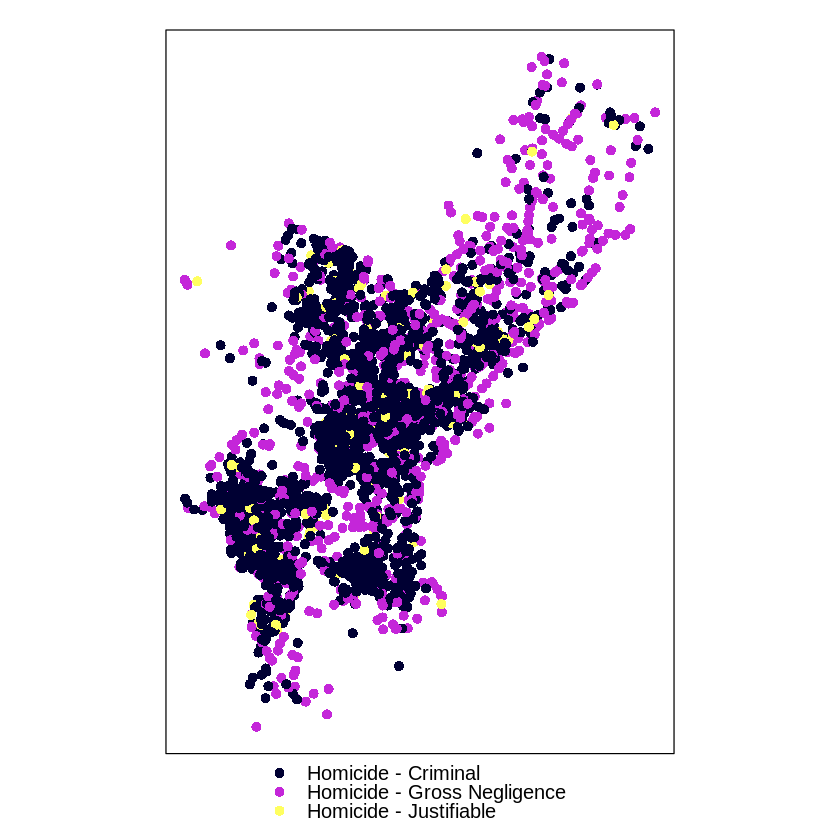

In [87]:
spplot(philly_hom["TEXT_GE"])